In [1]:

library(tidyverse) # metapackage of all tidyverse packages
library(ggplot2)
library(dplyr)
install.packages("zipcodeR")
library(zipcodeR)
# list.files(path = "../input")
library(MASS)
library(caTools)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [2]:
df <- read.csv(file='../input/ebay-delivery-date-prediction/eBay Delivery date prediction.csv')

In [3]:
head(df)

,X,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
,<int>,<chr>,<int>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,0,B2C,25454,3,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
2,1,C2C,6727381,2,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
3,2,B2C,18507,1,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
4,3,B2C,4677,1,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
5,4,B2C,4677,1,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5
6,5,B2C,10514,1,2019-04-19 19:42:00.000-04:00,0,0.0,3,5,43215,77063,3,10.39,1,2019-04-18 14:11:09.000-04:00,2019-04-22,1,1,PACKAGE_THICK_ENVELOPE,6


In [4]:
nrow(df)

[1] 15000000

In [5]:
#creating a copy of the datframe
data <- data.frame(df)     

In [6]:
#cheking all columns
colnames(data)

[1] "X"                         "b2c_c2c"                  
 [3] "seller_id"                 "declared_handling_days"   
 [5] "acceptance_scan_timestamp" "shipment_method_id"       
 [7] "shipping_fee"              "carrier_min_estimate"     
 [9] "carrier_max_estimate"      "item_zip"                 
[11] "buyer_zip"                 "category_id"              
[13] "item_price"                "quantity"                 
[15] "payment_datetime"          "delivery_date"            
[17] "weight"                    "weight_units"             
[19] "package_size"              "record_number"

In [7]:
#checkig how many null values exist is datafram
# sum(is.na(df))
colSums(is.na(data))

X                   b2c_c2c                 seller_id 
                        0                         0                         0 
   declared_handling_days acceptance_scan_timestamp        shipment_method_id 
                   702886                         0                         0 
             shipping_fee      carrier_min_estimate      carrier_max_estimate 
                        0                         0                         0 
                 item_zip                 buyer_zip               category_id 
                        0                         0                         0 
               item_price                  quantity          payment_datetime 
                        0                         0                         0 
            delivery_date                    weight              weight_units 
                        0                         0                         0 
             package_size             record_number 
                        0                         0

declared_handling_days is the only column with missing values =702886.
declared_handling_days - The number of days taken by the seller to ship the carrier from the day of acceptance.


In [8]:
#dropping column since imputing such a large number of missing values might create a bias in the data
data = subset(df, select = -c(X) )

In [9]:
str(data)

'data.frame':	15000000 obs. of  19 variables:
 $ b2c_c2c                  : chr  "B2C" "C2C" "B2C" "B2C" ...
 $ seller_id                : int  25454 6727381 18507 4677 4677 10514 104 340356 113915 130301 ...
 $ declared_handling_days   : num  3 2 1 1 1 1 1 1 5 1 ...
 $ acceptance_scan_timestamp: chr  "2019-03-26 15:11:00.000-07:00" "2018-06-02 12:53:00.000-07:00" "2019-01-07 16:22:00.000-05:00" "2018-12-17 16:56:00.000-08:00" ...
 $ shipment_method_id       : int  0 0 0 0 0 0 0 0 3 1 ...
 $ shipping_fee             : num  0 3 4.5 0 0 0 0 2.95 0 0 ...
 $ carrier_min_estimate     : int  3 3 3 3 3 3 3 3 2 2 ...
 $ carrier_max_estimate     : int  5 5 5 5 5 5 5 5 8 5 ...
 $ item_zip                 : chr  "97219" "11415-3528" "27292" "90703" ...
 $ buyer_zip                : chr  "49040" "62521" "53010" "80022" ...
 $ category_id              : int  13 0 1 1 1 3 11 1 18 13 ...
 $ item_price               : num  27.9 20.5 19.9 35.5 25 ...
 $ quantity                 : int  1 1 1 1 1 1 1 1 1

#Overall columnwise analysis 

1) b2c_c2c - It of type string with values b2c or c2c. This explains if the transaction happening is between business to customers or between customers and other customers.

2) seller_id - This is a unique ID given to each seller for identification. It is of type Long Int.

3) declared_handling_days - The number of days taken by the seller to ship the carrier from the day of acceptance.

4) acceptance_scan_timestamp - The date and time when the carrier has accepted the package for the final shipment. The values in this are of type timestamp.

5) shipment_method_id - The integer type attribute defines the type of shipping service declared by the seller.

6) shipping_fee - Transportation and handling charges charged by the seller for shipping the items. All the values are in USD.

7) carrier_min_estimate - The minimum estimate of the number of required days by the carrier for the specified service.

8) carrier_max_estimate - The maximum estimate of the number of required days by the carrier for the specified service.

9) item_zip - The US Postal zip code of the package origin/source.

10) buyer_zip - The US Postal zip code of the package destination.

11) category_id - An integer type data attribute that categorizes the package by its type.

12) item_price - The price per item involved in the transaction.

13) quantity - Number of items involved in the transaction.

15) payment_datetime - A timestamp attribute that clocks in the time when the payment has been done for the particular transaction.

16) delivery_date - The actual delivery date of the package. This is the attribute that we need to predict using the other attributes.

17) weight - A scalar value that determines the sum of the weight of all quantities involved in the transaction.

18) weight_units - It defines the weight scalar value by telling if the measurements are in kilograms or pounds. Pounds are represented as 1 and Kilograms are denoted by 2.

19) package_size - It is a categorical value which categorizes the packages based on its sizes.

20) record_number - Unique integer number given to the transaction to identify them.

In [10]:
#we will encode this value 
unique(data$b2c_c2c) 

[1] "B2C" "C2C"

In [11]:
#encoding B2C as 0 and c2c as 1
data$b2c_c2c<-ifelse(data$b2c_c2c=="B2C",0,1)

In [12]:
head(data)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,0,25454,3,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
2,1,6727381,2,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
3,0,18507,1,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
4,0,4677,1,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
5,0,4677,1,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5
6,0,10514,1,2019-04-19 19:42:00.000-04:00,0,0.0,3,5,43215,77063,3,10.39,1,2019-04-18 14:11:09.000-04:00,2019-04-22,1,1,PACKAGE_THICK_ENVELOPE,6


In [13]:
#checking for the summary of the data to understand columnwise what is happening in each column
summary(data)

    b2c_c2c        seller_id       declared_handling_days
 Min.   :0.000   Min.   :      0   Min.   : 0.0          
 1st Qu.:0.000   1st Qu.:   5018   1st Qu.: 1.0          
 Median :0.000   Median :  37436   Median : 1.0          
 Mean   :0.291   Mean   : 271104   Mean   : 1.6          
 3rd Qu.:1.000   3rd Qu.: 203533   3rd Qu.: 2.0          
 Max.   :1.000   Max.   :7266448   Max.   :40.0          
                                   NA's   :702886        
 acceptance_scan_timestamp shipment_method_id  shipping_fee     
 Length:15000000           Min.   : 0.0000    Min.   :  -3.000  
 Class :character          1st Qu.: 0.0000    1st Qu.:   0.000  
 Mode  :character          Median : 0.0000    Median :   0.000  
                           Mean   : 0.8819    Mean   :   2.812  
                           3rd Qu.: 1.0000    3rd Qu.:   4.000  
                           Max.   :26.0000    Max.   :2000.000  
                                                                
 carrier_min_est

In [14]:
# library(tidyverse)
#preparing data for conversion to numeric values, truncating zipcode value
data$item_zip <- str_trunc(data$item_zip, 5, side = c("right"),  ellipsis = "")
data$buyer_zip <- str_trunc(data$buyer_zip, 5, side = c("right"),  ellipsis = "")

In [15]:
# #preparing data for conversion to numeric values
# data$item_zip <- gsub("-", "", data$item_zip)
# data$buyer_zip <- gsub("-", "", data$buyer_zip)

In [16]:
#converting to numeric
data$item_zip = as.numeric(as.character(data$item_zip))
data$buyer_zip = as.numeric(as.character(data$buyer_zip))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [17]:
head(data)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number
,<dbl>,<int>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>
1,0,25454,3,2019-03-26 15:11:00.000-07:00,0,0.0,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1
2,1,6727381,2,2018-06-02 12:53:00.000-07:00,0,3.0,3,5,11415,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2
3,0,18507,1,2019-01-07 16:22:00.000-05:00,0,4.5,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3
4,0,4677,1,2018-12-17 16:56:00.000-08:00,0,0.0,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4
5,0,4677,1,2018-07-27 16:48:00.000-07:00,0,0.0,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5
6,0,10514,1,2019-04-19 19:42:00.000-04:00,0,0.0,3,5,43215,77063,3,10.39,1,2019-04-18 14:11:09.000-04:00,2019-04-22,1,1,PACKAGE_THICK_ENVELOPE,6


In [18]:
#checkig how many null values exist is datafram
# sum(is.na(df))
colSums(is.na(data))

b2c_c2c                 seller_id    declared_handling_days 
                        0                         0                    702886 
acceptance_scan_timestamp        shipment_method_id              shipping_fee 
                        0                         0                         0 
     carrier_min_estimate      carrier_max_estimate                  item_zip 
                        0                         0                      5001 
                buyer_zip               category_id                item_price 
                      606                         0                         0 
                 quantity          payment_datetime             delivery_date 
                        0                         0                         0 
                   weight              weight_units              package_size 
                        0                         0                         0 
            record_number 
                        0

In [19]:
# drop values where zip codes are NA
data <- data[!is.na(data$item_zip),]
data <- data[!is.na(data$buyer_zip),]

In [20]:
#minimum shipping fee should not be negative so checking to see how any such values exist, neither should the carrier values.
nrow(data[data$shipping_fee < 0,])

[1] 21

In [21]:
#replacing neg values of shipping with zero
data[data$shipping_fee < 0,] <- 0     # Set negative values to 0

In [22]:
#only pacakge_size column has character values that need to be encoded before feeding it into the model
unique(data$package_size)#checking values in it

[1] "LETTER"                 "PACKAGE_THICK_ENVELOPE" "NONE"                  
[4] "LARGE_PACKAGE"          "LARGE_ENVELOPE"         "0"                     
[7] "EXTRA_LARGE_PACKAGE"    "VERY_LARGE_PACKAGE"

In [23]:
#checking how many zero values and if theyre of any significance
nrow(data[data$package_size==0,]) #only 21 data points which seems to be incorrect so dropping these rows.
data <- data[!(data$package_size ==0),]

[1] 21

In [24]:
#converting all package weights to kg and then dropping weight units column.
#if values in weight unit column = 1, then multiply weight*0.453592.

data$weight<-ifelse(data$weight_units==1,data$weight*0.453592,data$weight)
data = subset(data, select = -c(weight_units) )

In [25]:
#also weight of items cannot be 0 so checking how many such datapoints exist
# nrow(data[data$weight==0,])
# data <- data[!(data$weight ==0),]
data <- data[!is.na(data$declared_handling_days),]

In [26]:
# reset index of data table
rownames(data) <- 1:nrow(data)  

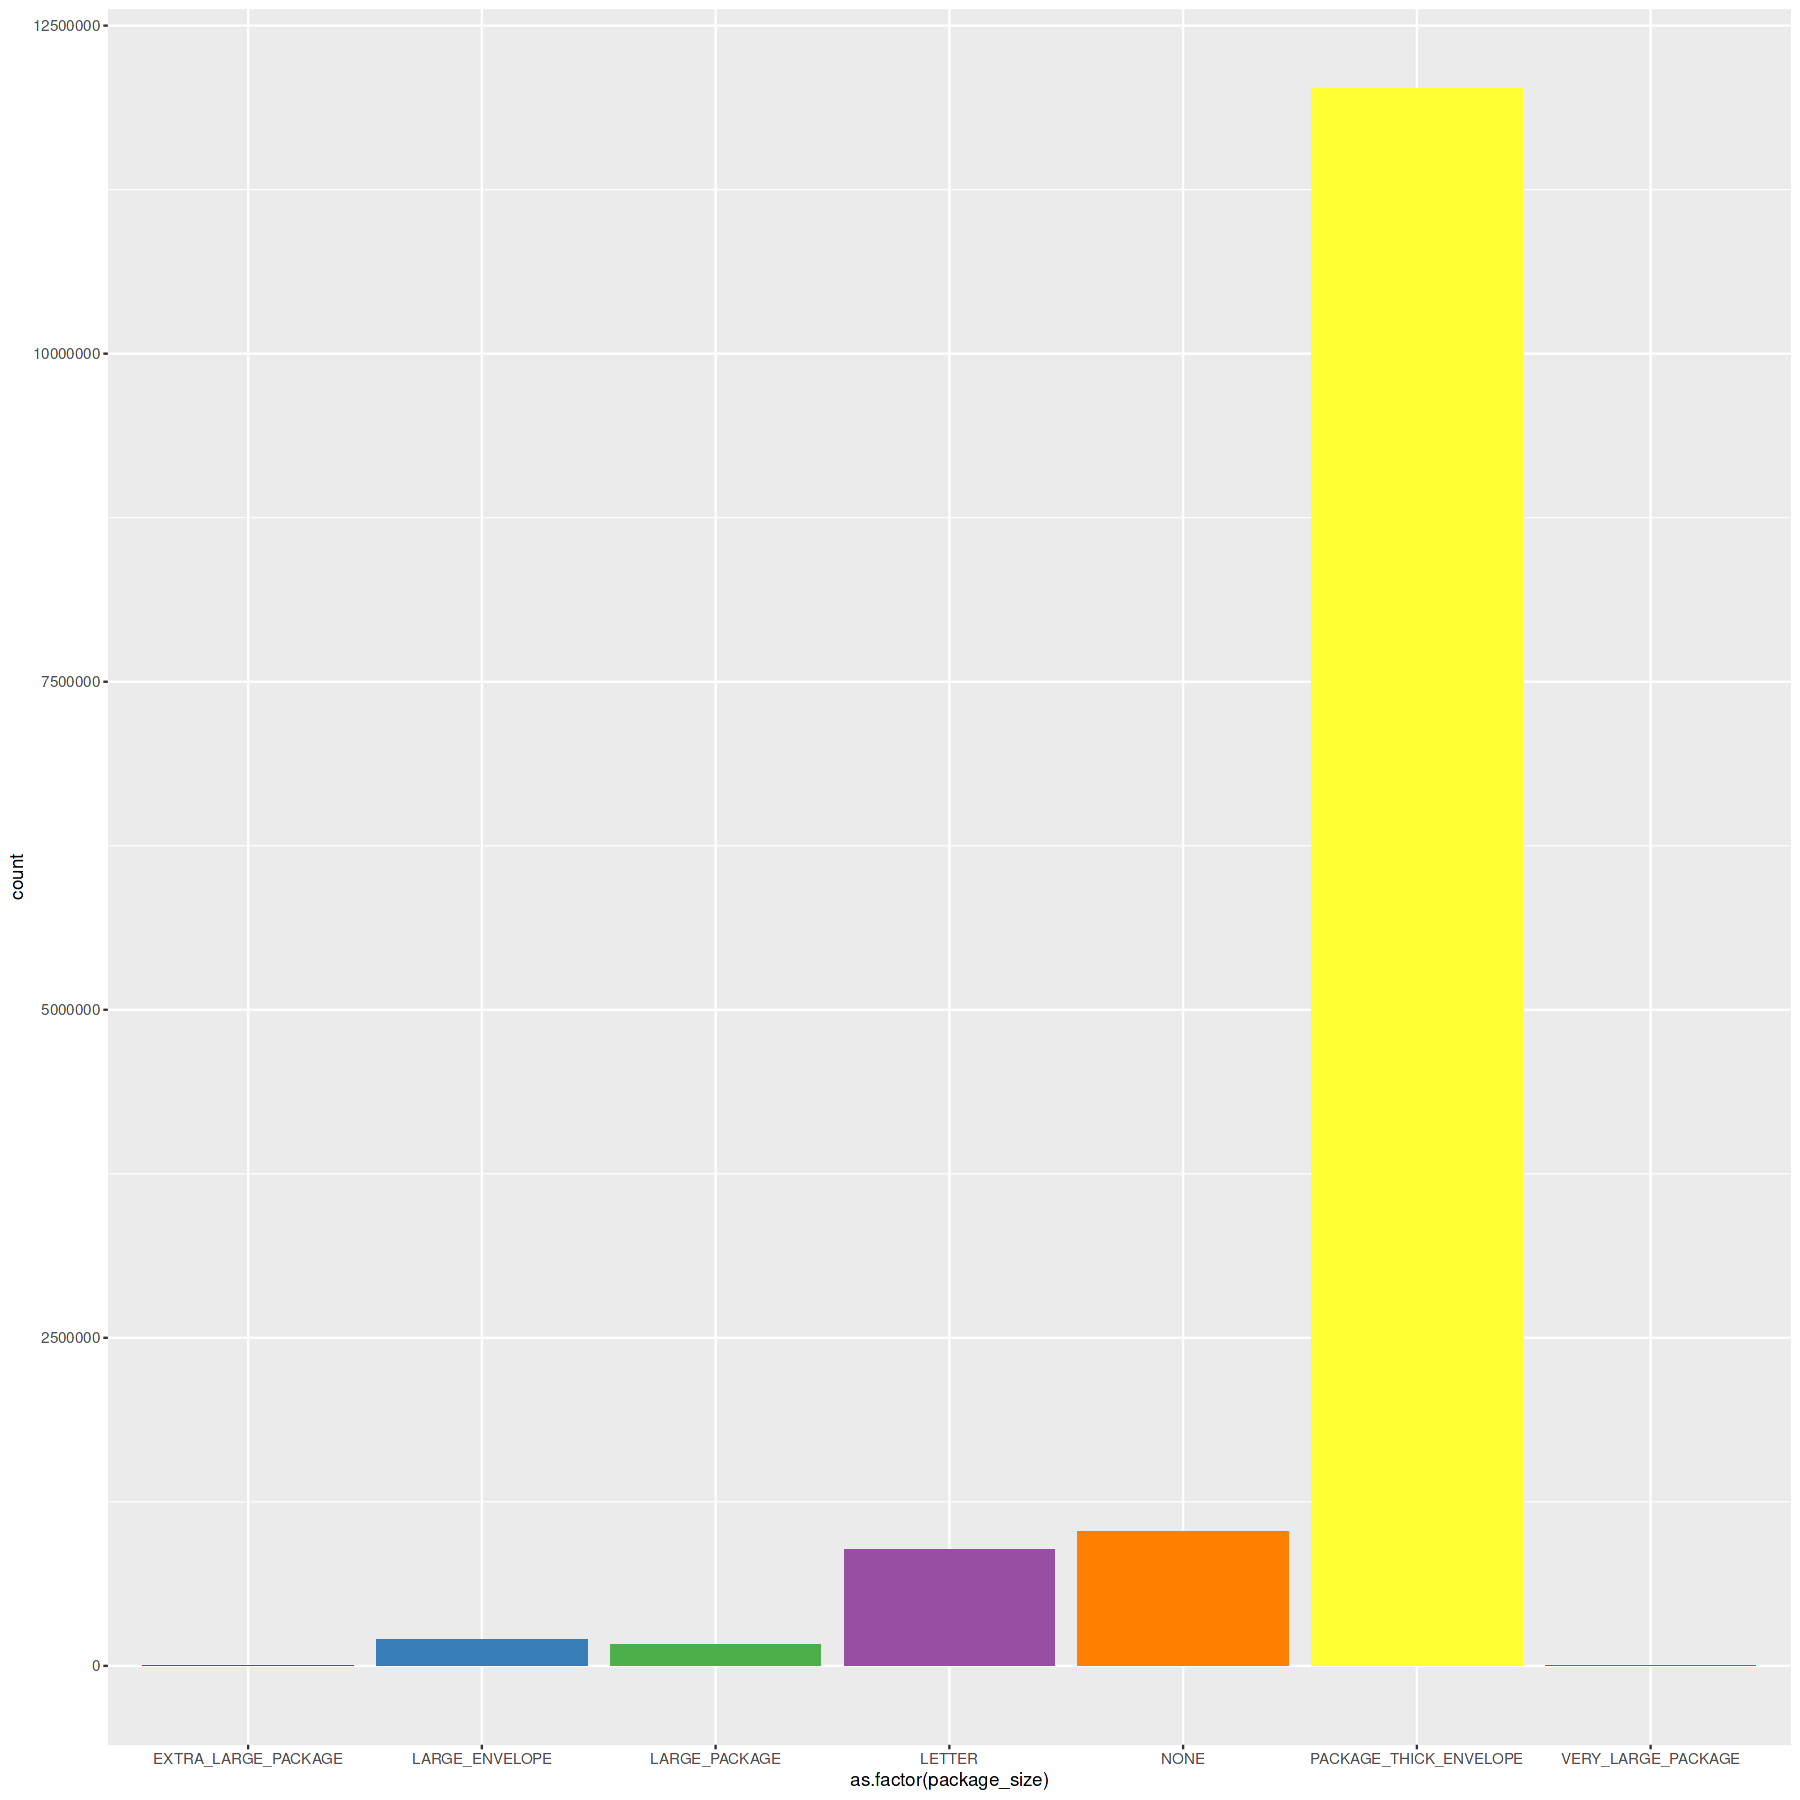

In [27]:
#checking distribution of package types
options(repr.plot.width = 15, repr.plot.height =15)
ggplot(data, aes(x=as.factor(package_size), fill=as.factor(package_size) )) + 
  geom_bar( ) +
  scale_fill_brewer(palette = "Set1") +
  theme(legend.position="none")

In [28]:
#factorizing categorical columns
data$declared_handling_days <-as.factor(data$declared_handling_days)
data$shipment_method_id<-as.factor(data$shipment_method_id)
data$package_size<- as.factor(as.numeric(as.factor(data$package_size)))
data$category_id <- as.factor(data$category_id)

In [29]:
#adding new column with average estimate of delivery time by using max and min of the column

data$carrier_average_estimate <-apply(data[,7:8],1,mean)

In [30]:
library(zipcodeR)

In [31]:
#adding new column measuring distance between item and buyer zipcodes
zip_distance <- data.frame(zip_distance(data$item_zip,data$buyer_zip)) #creating df of distance

#appending distance to data table
data <- data %>%
  add_column(Add_Column = zip_distance$distance)


#renaming column to "zip_distance"
names(data)[names(data) == "Add_Column"] = "zip_distance"

In [32]:
#adding date columns for each attribute 
data$acceptance_date <-as.Date(data$acceptance_scan_timestamp)
data$payment_date <-as.Date(data$payment_datetime)
data$delivery_date <-as.Date(data$delivery_date)

In [33]:
#adding columns for total days from time of order to delivery
data$delivery_date[1]-data$payment_date[1]

Time difference of 5 days

In [34]:
# data$acceptance_date <-as.Date(data$acceptance_scan_timestamp)
# data$payment_date <-as.Date(data$payment_datetime)
# data$delivery_date <-as.Date(data$delivery_date)

In [35]:
#calculating days to process order

time_to_process= data.frame(data$acceptance_date-data$payment_date)
# appending days_to_deliver to data table
data <- data %>%
  add_column(Add_Column = time_to_process$data.acceptance_date...data.payment_date)

# renaming column
names(data)[names(data) == "Add_Column"] = "time_to_process"
# converting to numeric
data$time_to_process <-as.numeric(as.character(data$time_to_process))

In [36]:
# #calculating days from acceptance to delivery
# time_to_process= data.frame(data$acceptance_date-data$payment_date)
# # appending days_to_deliver to data table
# data <- data %>%
#   add_column(Add_Column = time_to_process$data.acceptance_date...data.payment_date)

# # renaming column
# names(data)[names(data) == "Add_Column"] = "time_to_process"
# # converting to numeric
# data$time_to_process <-as.numeric(as.character(data$time_to_process))

In [37]:
#calculating days from acceptance to delivery
data1= data.frame(data$delivery_date-data$acceptance_date)
# appending days_to_deliver to data table
data <- data %>%
  add_column(Add_Column = data1$data.delivery_date...data.acceptance_date)

# # renaming column
names(data)[names(data) == "Add_Column"] = "acceptance_to_delivery"
# # converting to numeric
data$acceptance_to_delivery <-as.numeric(as.character(data$acceptance_to_delivery))

In [38]:
#calculating days to delivery
date= data.frame(data$delivery_date-data$payment_date)
# appending days_to_deliver to data table
data <- data %>%
  add_column(Add_Column = date$data.delivery_date...data.payment_date)

# renaming column
names(data)[names(data) == "Add_Column"] = "days_to_deliver"
# converting to numeric
data$days_to_deliver <-as.numeric(as.character(data$days_to_deliver))

In [39]:
# library(caTools)

# #make this example reproducible
# set.seed(666)

# #Use 70% of dataset as training set and remaining 30% as testing set
# sample <- sample.split(train$days_to_deliver, SplitRatio = 0.7)
# train_df  <- subset(train, sample == TRUE)
# test_df   <- subset(train, sample == FALSE)